# Step 1: Problem Understanding

## Project: Skill Gap and Employability Analysis


## Problem Statement

Many engineering students perform well academically but still face difficulties
in securing employment. There is limited data-driven understanding of how
academic performance, technical skills, and practical exposure together
influence employability.

This project aims to analyze student data to identify skill gaps that affect
placement outcomes.


## Definition of Employability

In this project, employability is defined using:
- Placement status (Placed / Not Placed)
- Salary category (Low / Medium / High)
- Type of job role (if available)

The analysis focuses on understanding patterns, not prediction.


In [1]:
import pandas as pd

df = pd.read_csv("../data/student_employability_data.csv")
df


,gender,age,cgpa,branch,coding_skill,internships,projects,communication_skill,placed,salary_category
0,Male,21,8.2,Computer,Advanced,2,3,High,Yes,High
1,Female,22,7.5,Electronics,Intermediate,1,2,Medium,No,Low


In [2]:
df.shape


(2, 10)

In [2]:
import sys
!{sys.executable} -m pip install pandas


  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
   ---------------------------------------- 0.0/11.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.3 MB ? eta -:--:--
    --------------------------------------- 0.3/11.3 MB ? eta -:--:--
    --------------------------------------- 0.3/11.3 MB ? eta -:--:--
   - --------------------

In [3]:
df.columns


Index(['gender', 'age', 'cgpa', 'branch', 'coding_skill', 'internships',
       'projects', 'communication_skill', 'placed', 'salary_category'],
      dtype='object')

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               2 non-null      object 
 1   age                  2 non-null      int64  
 2   cgpa                 2 non-null      float64
 3   branch               2 non-null      object 
 4   coding_skill         2 non-null      object 
 5   internships          2 non-null      int64  
 6   projects             2 non-null      int64  
 7   communication_skill  2 non-null      object 
 8   placed               2 non-null      object 
 9   salary_category      2 non-null      object 
dtypes: float64(1), int64(3), object(6)
memory usage: 288.0+ bytes


In [5]:
df.describe()


,age,cgpa,internships,projects
count,2.000000,2.000000,2.000000,2.000000
mean,21.500000,7.850000,1.500000,2.500000
std,0.707107,0.494975,0.707107,0.707107
min,21.000000,7.500000,1.000000,2.000000
25%,21.250000,7.675000,1.250000,2.250000
50%,21.500000,7.850000,1.500000,2.500000
75%,21.750000,8.025000,1.750000,2.750000
max,22.000000,8.200000,2.000000,3.000000


In [6]:
df['placed'].value_counts()


placed
Yes    1
No     1
Name: count, dtype: int64

In [8]:
import sys
!{sys.executable} -m pip install matplotlib


  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.1 MB 578.7 kB/s eta 0:00:14
   -- ------------------------------------- 0.5/8.1 MB 578.7 kB/s eta 0:00:14
   --- ------------------------------------ 0.8/8.1 MB 588.4 kB/s eta 0:00:13
   --- ------------------------------------ 0.8/8.1 MB 588.4 kB/s eta 0:00:13
   --- ------------------------------------ 0.8/8.1 MB 588.4 kB/s eta 0:00:13
   --- ------------------------------------ 0.8/8.1 MB 588.4 kB/s eta 0:00:13
   ----- ---------------------------------- 1.0/8.1 MB

In [9]:
import matplotlib.pyplot as plt
print("matplotlib ready")


matplotlib ready


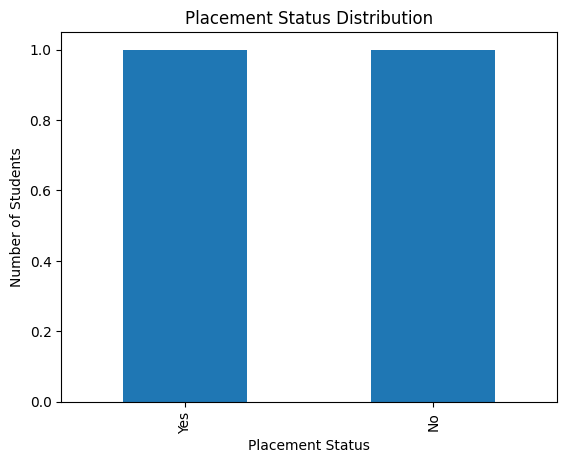

In [10]:
df['placed'].value_counts().plot(kind='bar')
plt.title('Placement Status Distribution')
plt.xlabel('Placement Status')
plt.ylabel('Number of Students')
plt.show()


### Placement Status Analysis

The bar chart shows the distribution of students who are placed and not placed.
This provides a baseline understanding of employability in the dataset.

Such an analysis helps identify how many students require further skill development
to improve their placement outcomes.


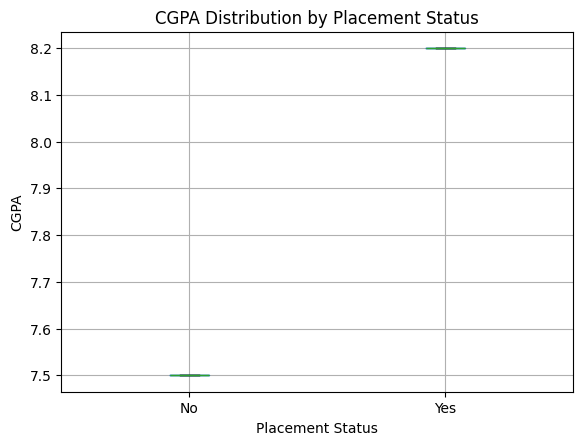

In [11]:
df.boxplot(column='cgpa', by='placed')
plt.title('CGPA Distribution by Placement Status')
plt.suptitle('')  # removes automatic subtitle
plt.xlabel('Placement Status')
plt.ylabel('CGPA')
plt.show()


### CGPA vs Placement Analysis

The boxplot compares the CGPA distribution of placed and non-placed students.
While placed students tend to have slightly higher CGPA values, there is noticeable
overlap between the two groups.

This indicates that academic performance alone is not sufficient to guarantee
placement, highlighting the importance of additional skills and practical exposure.


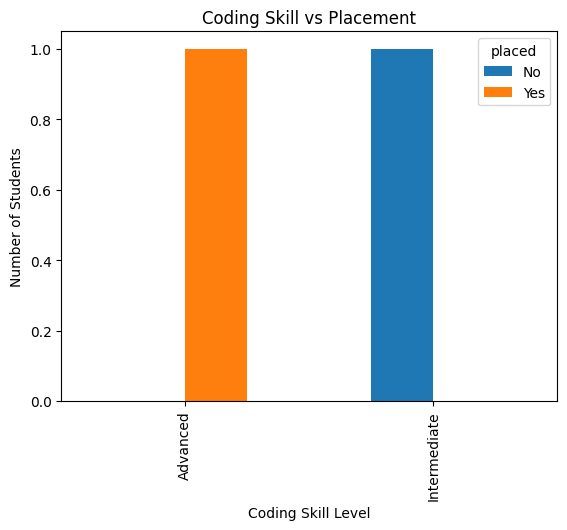

In [12]:
coding_placement = pd.crosstab(df['coding_skill'], df['placed'])
coding_placement.plot(kind='bar')
plt.title('Coding Skill vs Placement')
plt.xlabel('Coding Skill Level')
plt.ylabel('Number of Students')
plt.show()


### Coding Skill vs Placement Analysis

The bar chart shows a clear relationship between coding skill level and placement outcomes.
Students with advanced coding skills have a higher placement rate compared to those with
beginner-level skills.

This suggests that technical proficiency plays a significant role in employability and
can compensate for moderate academic performance.


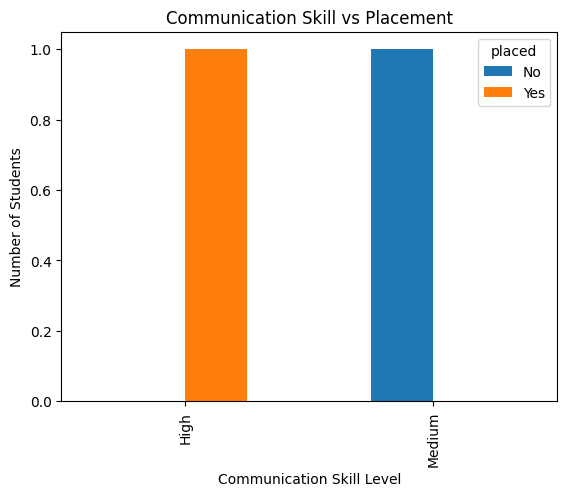

In [13]:
communication_placement = pd.crosstab(df['communication_skill'], df['placed'])
communication_placement.plot(kind='bar')
plt.title('Communication Skill vs Placement')
plt.xlabel('Communication Skill Level')
plt.ylabel('Number of Students')
plt.show()


### Communication Skill vs Placement Analysis

The bar chart indicates that students with higher communication skills have better
placement outcomes compared to those with low communication skills.

This highlights the importance of soft skills alongside technical knowledge in improving
employability and securing job opportunities.


## Key Insights and Conclusion

- Academic performance (CGPA) alone does not guarantee placement, as there is overlap
  between placed and non-placed students.
- Students with advanced coding skills show significantly better placement outcomes,
  highlighting the importance of technical proficiency.
- Communication skills play a crucial role in employability, with higher skill levels
  associated with improved placement rates.
- Practical exposure through skills and competencies can compensate for moderate academic
  scores.

### Conclusion

This analysis demonstrates that employability is influenced by a combination of academic
performance, technical skills, and soft skills. Focusing on skill development can help
students bridge employability gaps and improve placement outcomes.
